DEPRESSION AND STRESS PREDICTION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import iplot


DATA COLLECTION AND PROCESSING

In [ ]:
#load the csv data to a pandas dataframe
df=pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
#printing the 10 five rows of a data frame
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
#printing the last 10 rows of a dataset
df.tail(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#number of rows and cols in a dataset 
df.shape

(303, 14)

In [ ]:
#getting some info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


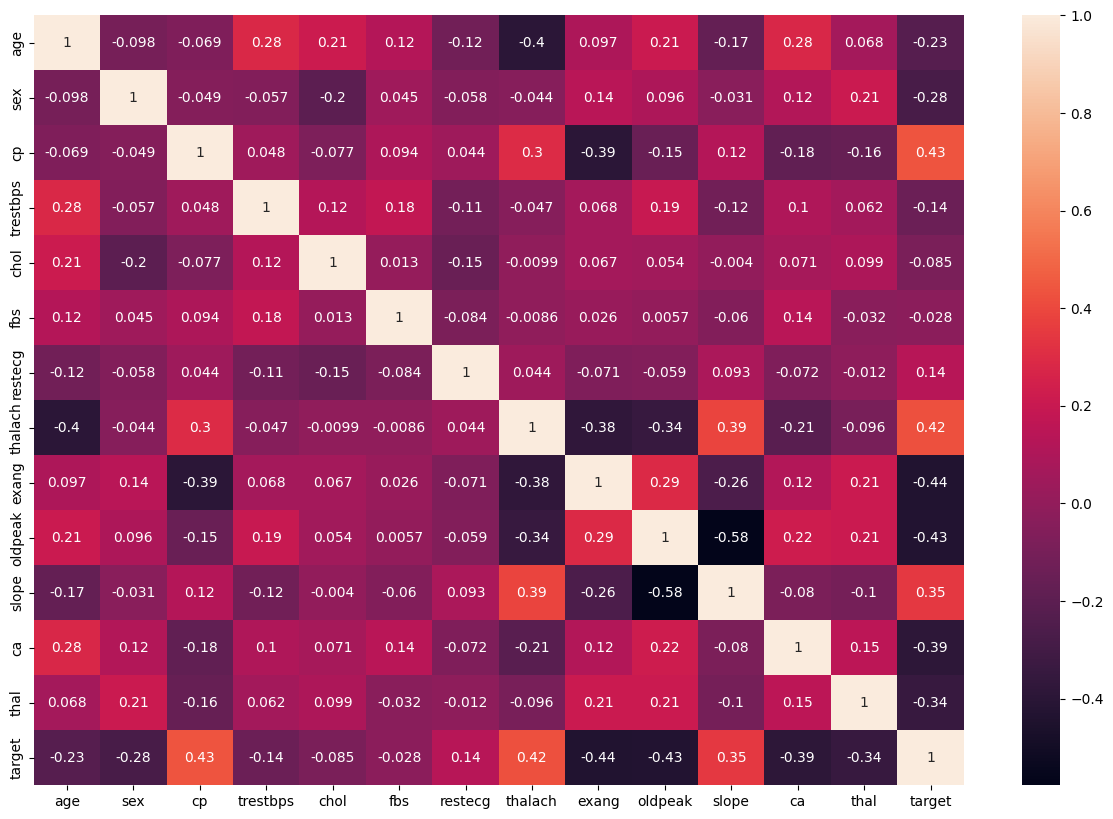

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2g');

In [ ]:
#checking for missing values
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#statistical measures about dataset
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#checking the distribution of Target variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,3,31,64,1,0,49,0,22,0,0,1,1
1,3,1,2,22,80,0,1,84,0,32,0,0,2,1
2,7,0,1,22,35,0,0,71,0,14,2,0,2,1
3,22,1,1,14,67,0,1,76,0,8,2,0,2,1
4,23,0,0,14,145,0,1,62,1,6,2,0,2,1
5,23,1,0,28,25,0,1,47,0,4,1,0,1,1
6,22,0,1,28,116,0,0,52,0,13,1,0,2,1
7,10,1,1,14,92,0,1,72,0,0,2,0,3,1
8,18,1,2,43,31,1,1,61,0,5,2,0,3,1
9,23,1,2,34,9,0,1,73,0,16,2,0,2,1


In [ ]:
#tranforming categorical data to numerical
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() 
for column in df:
    df[column] = labelencoder.fit_transform(df[column]) 
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,3,31,64,1,0,49,0,22,0,0,1,1
1,3,1,2,22,80,0,1,84,0,32,0,0,2,1
2,7,0,1,22,35,0,0,71,0,14,2,0,2,1
3,22,1,1,14,67,0,1,76,0,8,2,0,2,1
4,23,0,0,14,145,0,1,62,1,6,2,0,2,1
5,23,1,0,28,25,0,1,47,0,4,1,0,1,1
6,22,0,1,28,116,0,0,52,0,13,1,0,2,1
7,10,1,1,14,92,0,1,72,0,0,2,0,3,1
8,18,1,2,43,31,1,1,61,0,5,2,0,3,1
9,23,1,2,34,9,0,1,73,0,16,2,0,2,1


In [ ]:
#splitting the features and target 
#as we are dropping the colums so 1 if row 0
X=df.drop(columns='target',axis=1)
Y=df['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     29    1   3        31    64    1        0       49      0       22   
1      3    1   2        22    80    0        1       84      0       32   
2      7    0   1        22    35    0        0       71      0       14   
3     22    1   1        14    67    0        1       76      0        8   
4     23    0   0        14   145    0        1       62      1        6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   23    0   0        28    71    0        1       23      1        2   
299   11    1   3         8    93    0        1       32      0       12   
300   34    1   0        30    26    1        1       40      0       31   
301   23    1   0        22     1    0        1       16      1       12   
302   23    0   1        22    67    0        0       73      0        0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
#splitting the data into training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X , Y, test_size=0.20, stratify=Y,  random_state=2)


In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


MODEL TRAINING

Logistic Regression

In [ ]:
model=LogisticRegression()

In [ ]:
#training the logistic regression 
model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
#accuracy score
X_Train_predection=model.predict(X_train)
training_accuracy=accuracy_score(X_Train_predection,Y_train)

In [ ]:
print("accuracy on Training data :",training_accuracy)

accuracy on Training data : 0.859504132231405


In [ ]:
#accuracy on test data
X_Test_predection=model.predict(X_test)
testing_accuracy=accuracy_score(X_Test_predection,Y_test)

In [ ]:
print("accuracy on testing data : ",testing_accuracy)

accuracy on testing data :  0.5349397590361445


Hybrid Model (Decision Tree and Ensemble Bagging Classifier)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
# Create a base model
base_model = DecisionTreeClassifier()

# Create an Ensemble Bagging Classifier with 10 base models
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=10, random_state=42)

# Train the model on your data
bagging_model.fit(X_train, Y_train)

# Make predictions on your test data
y_pred = bagging_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 72.13%


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



In [ ]:

import pickle
# train the bagging_model
# Save the model as a pickle file
with open('bagging_model.pickle', 'wb') as f:
    pickle.dump(bagging_model, f)
